<a href="https://colab.research.google.com/github/CrabRave4204/KSU-IE/blob/main/Henry_Walston_SQC_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:

from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
# Problem 1: Excercises 4.35 & 4.36

C2F6 = {
'Flow': [125, 160, 200],
'1': [2.7, 4.6, 4.6],
'2': [2.6, 4.9, 2.9],
'3': [4.6, 5.0, 3.4],
'4': [3.2, 4.2, 3.5],
'5': [3.0, 3.6, 4.1],
'6': [3.8, 4.2, 5.1]
}


In [85]:
df = pd.DataFrame(C2F6)
print(df)


   Flow    1    2    3    4    5    6
0   125  2.7  2.6  4.6  3.2  3.0  3.8
1   160  4.6  4.9  5.0  4.2  3.6  4.2
2   200  4.6  2.9  3.4  3.5  4.1  5.1


In [86]:
df_melted = pd.melt(df, id_vars=['Flow'], var_name='Sensor', value_name='Value')


fvalue, pvalue = stats.f_oneway(
    df_melted['Value'][df_melted['Flow'] == 125],
    df_melted['Value'][df_melted['Flow'] == 160],
    df_melted['Value'][df_melted['Flow'] == 200]
)

print(f"F-value: {fvalue}")
print(f"P-value: {pvalue}")



F-value: 3.5856269113149857
P-value: 0.05336512592803552


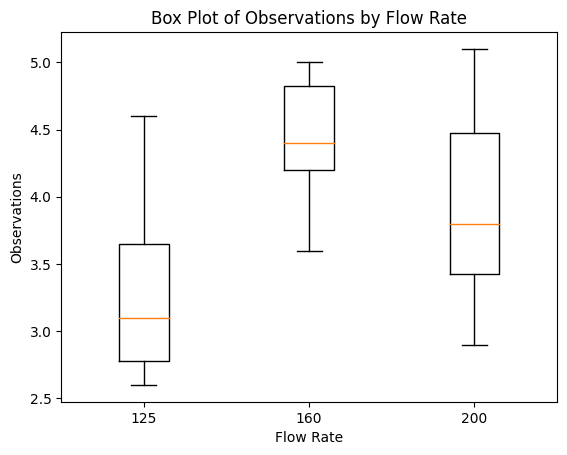

In [87]:

plt.boxplot([df_melted['Value'][df_melted['Flow'] == 125],
             df_melted['Value'][df_melted['Flow'] == 160],
             df_melted['Value'][df_melted['Flow'] == 200]],
            labels=['125', '160', '200'])
plt.xlabel('Flow Rate')
plt.ylabel('Observations')
plt.title('Box Plot of Observations by Flow Rate')
plt.show()


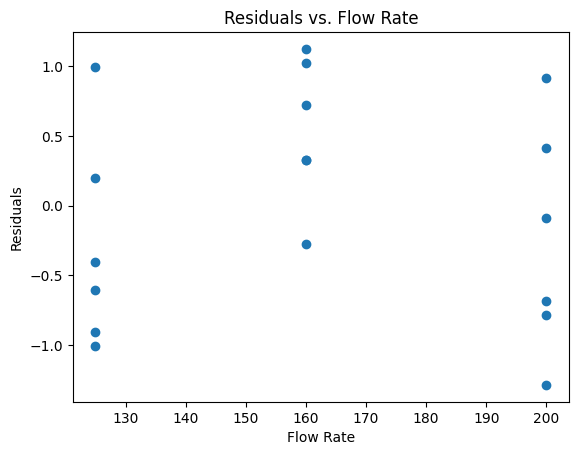

In [88]:

import statsmodels.formula.api as sm

model = sm.ols('Value ~ Flow', data=df_melted).fit()

residuals = model.resid

plt.scatter(df_melted['Flow'], residuals)
plt.xlabel('Flow Rate')
plt.ylabel('Residuals')
plt.title('Residuals vs. Flow Rate')
plt.show()


In [89]:


from scipy.stats import shapiro

for flow_rate in df['Flow'].unique():
  data = df_melted['Value'][df_melted['Flow'] == flow_rate]
  statistic, p_value = shapiro(data)
  print(f"Flow Rate: {flow_rate}")
  print(f"Shapiro Test Statistic: {statistic}")
  print(f"P-value: {p_value}")
  print("---------------------------------------------")


Flow Rate: 125
Shapiro Test Statistic: 0.9000895264562164
P-value: 0.37445940662122623
---------------------------------------------
Flow Rate: 160
Shapiro Test Statistic: 0.9364181676413699
P-value: 0.6304925627126303
---------------------------------------------
Flow Rate: 200
Shapiro Test Statistic: 0.965114901952876
P-value: 0.8581580660195343
---------------------------------------------


In [90]:

for flow_rate in df['Flow'].unique():
  mean_value = df_melted['Value'][df_melted['Flow'] == flow_rate].mean()
  print(f"{flow_rate}: {round(mean_value,3)}")


125: 3.317
160: 4.417
200: 3.933


In [91]:

from scipy.stats import ttest_ind
from scipy.stats import t

flow_rates = df['Flow'].unique()
for i in range(len(flow_rates)):
  for j in range(i + 1, len(flow_rates)):
    flow_rate1 = flow_rates[i]
    flow_rate2 = flow_rates[j]

    data1 = df_melted['Value'][df_melted['Flow'] == flow_rate1]
    data2 = df_melted['Value'][df_melted['Flow'] == flow_rate2]

    t_statistic, p_value = ttest_ind(data1, data2, equal_var=False)

    df_welch = ((data1.var() / 6 + data2.var() / 6) ** 2) / \
              ((data1.var() / 6) ** 2 / 5 + (data2.var() / 6) ** 2 / 5)

    alpha = 0.05
    critical_t = t.ppf(1 - alpha / 2, df_welch)

    print(f"{flow_rate1} vs {flow_rate2}:")
    print(f"T-stat: {t_statistic}")
    print(f"P-value: {p_value}")
    print(f"Critical t-value: {critical_t}")
    print("---------------------------------------------")


125 vs 160:
T-stat: -2.9202396357403257
P-value: 0.01728654013298562
Critical t-value: 2.267257131575057
---------------------------------------------
125 vs 200:
T-stat: -1.349789758764916
P-value: 0.2070179434052791
Critical t-value: 2.229952108043448
---------------------------------------------
160 vs 200:
T-stat: 1.2157432436359241
P-value: 0.25682981012435646
Critical t-value: 2.283339614998387
---------------------------------------------


In [54]:
# Problem 2: Excercise 4.53

from scipy.stats import t

def calculate_p(t_value, df):
  p_value = t.sf(abs(t_value), df)
  return p_value

for i in [2.3, 3.41, 1.98, 1.55]:
  t_value = i
  df = 14
  p_value = calculate_p(t_value, df)
  print(f"If t0 = {round(i,2)} then P = {round(p_value,5)}")



If t0 = 2.3 then P = 0.01868
If t0 = 3.41 then P = 0.00211
If t0 = 1.98 then P = 0.03385
If t0 = 1.55 then P = 0.07172


In [58]:
#Problem 3: Excersice 4.47

import pandas as pd

HP = pd.read_csv('/content/drive/MyDrive/Table 4E.10.csv')

print(HP)


    BrakeHP   rpm  Octane  Compression
0       225  2000      90          100
1       212  1800      94           95
2       229  2400      88          110
3       222  1900      91           96
4       219  1600      86          100
5       278  2500      96          110
6       246  3000      94           98
7       237  3200      90          100
8       233  2800      88          105
9       224  3400      86           97
10      223  1800      90          100
11      230  2500      89          104


In [80]:
import statsmodels.formula.api as sm

model = sm.ols('BrakeHP ~  rpm +Octane +Compression', data=HP).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                BrakeHP   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Fri, 20 Sep 2024   Prob (F-statistic):            0.00317
Time:                        02:50:30   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -266.0312     92.674     -2.871      

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [74]:
for predictor in ['rpm', 'Octane', 'Compression']:
  model_single = sm.ols(f'BrakeHP ~ {predictor}', data=HP).fit()
  r_squared = model_single.rsquared
  print(f"R-squared for {predictor}: {r_squared}")


R-squared for rpm: 0.15862773625348459
R-squared for Octane: 0.3149006218176681
R-squared for Compression: 0.36691773611919465
